In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [19]:
data = pd.read_csv("data.csv")
X = data.drop(columns=['verification.time'])
y = data['verification.time']


In [23]:
print (y)
print(type(y))

0        163.316667
1        200.860000
2        154.888889
3        108.640000
4         85.466667
           ...     
2038      82.425000
2039    1316.983333
2040    9365.450000
2041    8474.025000
2042      82.008333
Name: verification.time, Length: 2043, dtype: float64
<class 'pandas.core.series.Series'>


In [100]:
scores={}

In [24]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [25]:
hpt_svm_reg = SVR(kernel = "rbf")
hpt_svm_reg.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [26]:

hpt_param_grid = [{'C':[i for i in range(1,10)],
                   'gamma' : np.linspace(0,0.1)}]
hpt_param_grid

[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
  'gamma': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
         0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
         0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
         0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
         0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
         0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
         0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
         0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
         0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
         0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])}]

In [28]:

grid_search = GridSearchCV(estimator = hpt_svm_reg,param_grid = hpt_param_grid,cv = 5)

In [30]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'gamma': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
       0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
       0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
       0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
       0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
       0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
       0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
       0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
       0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
       0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])}])

In [31]:
print(grid_search.best_params_)

{'C': 9, 'gamma': 0.0979591836734694}


In [32]:
score_rbf=print(grid_search.best_score_)
score_rbf

-0.2928285216117758


In [33]:
s_rbf = SVR(kernel='rbf',C=9, gamma=0.1)

s_rbf.fit(X_train, y_train)
score_svm_rbf = s_rbf.score(X_test, y_test)

print(score_svm_rbf)

-0.2404809564950594


In [34]:
hpt_param_dict = {'C' : [i for i in range(0,100)],'gamma' : np.linspace(0,0.1)}

In [35]:
random_search = RandomizedSearchCV(estimator = hpt_svm_reg, param_distributions = hpt_param_dict,cv = 5)

In [36]:
random_search.fit(X_train, y_train)
random_search.best_params_

{'gamma': 0.09387755102040818, 'C': 98}

In [37]:
random_search.best_score_

0.1590114060994929

In [38]:
svm_rbf_r = SVR(kernel='rbf',C=77, gamma=0.06938775510204082)

svm_rbf_r.fit(X_train, y_train)
score_svm_rbf_r = svm_rbf_r.score(X_test, y_test)

print(score_svm_rbf_r)

0.14517028388819597


In [39]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred1 = decision_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
mape= mean_absolute_percentage_error(y_test, y_pred1)


In [40]:
print("Decision Tree Regressor")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print("Mean absolute error(MAE) %.2f"%mae)
print("Mean absolute percentage error(MAPE) %.2f"%mape)

Decision Tree Regressor
Mean Squared Error (MSE): 1007765.947099873
R-squared (R2) Score: 0.9901648038777576
Mean absolute error(MAE) 421.50
Mean absolute percentage error(MAPE) 0.04


In [ ]:
hyperpt_decision_tree = DecisionTreeRegressor(random_state=42)
hyperpt_decision_tree.get_params()

In [42]:
hyperpt_decision_tree = DecisionTreeRegressor(random_state=42)
hyperpt_decision_tree.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [43]:
hyperpt_param_grid1 = [{'max_depth': [i for i in range(1, 20)],
                       'max_features': [i for i in range(1, 8)],
                       'max_leaf_nodes': [None, 10, 20, 30, 40, 50]}]
hyperpt_param_grid1

[{'max_depth': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19],
  'max_features': [1, 2, 3, 4, 5, 6, 7],
  'max_leaf_nodes': [None, 10, 20, 30, 40, 50]}]

In [44]:
grid_search_decision_tree = GridSearchCV(estimator = hyperpt_decision_tree,
                   param_grid = hyperpt_param_grid1,
                   cv=5)

In [45]:
grid_search_decision_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19],
                          'max_features': [1, 2, 3, 4, 5, 6, 7],
                          'max_leaf_nodes': [None, 10, 20, 30, 40, 50]}])

In [46]:
grid_search_decision_tree.best_params_

{'max_depth': 14, 'max_features': 7, 'max_leaf_nodes': None}

In [47]:
grid_search_decision_tree.best_score_

0.9892098163565033

In [48]:
grid_search_decision_tree.best_estimator_

DecisionTreeRegressor(max_depth=14, max_features=7, random_state=42)

In [49]:
dtr = DecisionTreeRegressor(max_depth=18,max_features=6, max_leaf_nodes=45, random_state=42)
dtr.fit(X_train,y_train)
score_dt = dtr.score(X_test,y_test)
print(score_dt)

0.9855897350665728


In [51]:
hyp_param_dict2=[{'max_depth':[i for i in range(0,20)]}]
hyp_param_dict2

[{'max_depth': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19]}]

In [53]:
hyp_dec_tree = DecisionTreeRegressor()

decisiontree_rnd = RandomizedSearchCV(estimator = hyp_dec_tree,
                   param_distributions = hyp_param_dict2,
                   cv=5)

In [54]:
decisiontree_rnd.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions=[{'max_depth': [0, 1, 2, 3, 4, 5, 6, 7,
                                                       8, 9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19]}])

In [56]:
decisiontree_rnd.best_params_
decisiontree_rnd.best_estimator_

DecisionTreeRegressor(max_depth=14)

In [57]:
decisiontree_rnd.best_score_

0.9902158240331055

In [58]:
dt_rand = DecisionTreeRegressor(max_depth=12,random_state=42)
dt_rand.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=12, random_state=42)

In [59]:

score_dt_rand = dt_rand.score(X_test,y_test)
print(score_dt_rand)

0.9898321500476028


In [60]:
random_forest=RandomForestRegressor(random_state=42)
random_forest.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [61]:
y_pred2 = random_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
mape= mean_absolute_percentage_error(y_test, y_pred2)


In [62]:
print("Random Forest Regressor")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print("Mean absolute error(MAE) %.2f"%mae)
print("Mean absolute percentage error(MAPE) %.2f"%mape)

Random Forest Regressor
Mean Squared Error (MSE): 596418.9033747653
R-squared (R2) Score: 0.99417930631355
Mean absolute error(MAE) 351.68
Mean absolute percentage error(MAPE) 0.05


In [63]:
hyp_random_forest = RandomForestRegressor(random_state=42)
hyp_random_forest.get_params()
hyp_grid = [{'n_estimators' : [i for i in range(10,200,10)]},
                  {'max_depth':[j for j in range(10)]}]
hyp_grid

[{'n_estimators': [10,
   20,
   30,
   40,
   50,
   60,
   70,
   80,
   90,
   100,
   110,
   120,
   130,
   140,
   150,
   160,
   170,
   180,
   190]},
 {'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]

In [64]:
grid_search = GridSearchCV(estimator = hyp_random_forest,
                          param_grid = hyp_grid,
                          cv = 5)

In [65]:
grid_search.fit(X_train,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 145.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.11/site-packa

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100, 110, 120, 130, 140, 150, 160,
                                           170, 180, 190]},
                         {'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}])

In [66]:
grid_search.best_params_
grid_search.best_score_

0.9932848053144554

In [67]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=180, random_state=42)

In [68]:
rand_for = RandomForestRegressor(max_depth = 9, n_estimators = 180,random_state = 42)
rand_for.fit(X_train,y_train)
score_rand_for = rand_for.score(X_test,y_test)
print(score_rand_for)

0.9910424178728259


In [69]:
hyp_grid2 = [{'n_estimators' : [i for i in range(0,10)]},
                  {'max_depth':[j for j in range(10)]}]
hyp_grid2

[{'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
 {'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]

In [70]:
randomforest_rd = RandomizedSearchCV( estimator = hyp_random_forest,
                                   param_distributions = hyp_grid2,
                                    cv=5)
randomforest_rd.fit(X_train,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.11/site-packa

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions=[{'n_estimators': [0, 1, 2, 3, 4, 5, 6,
                                                          7, 8, 9]},
                                        {'max_depth': [0, 1, 2, 3, 4, 5, 6, 7,
                                                       8, 9]}])

In [71]:
randomforest_rd.best_params_

{'n_estimators': 8}

In [72]:
randomforest_rd.best_estimator_

RandomForestRegressor(n_estimators=8, random_state=42)

In [73]:
randomforest_rd.best_score_

0.992484562230984

In [74]:
rand_for_rd = RandomForestRegressor(max_depth = 9,n_estimators =9,random_state=42)
rand_for_rd.fit(X_train,y_train)

score_rand_for_rd = rand_for_rd.score(X_test,y_test)
print(score_rand_for_rd)

0.9908227405495534


In [75]:
base_estimator = DecisionTreeRegressor(max_depth=3)
adaboost = AdaBoostRegressor(base_estimator,random_state=42, n_estimators=50)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), random_state=42)

In [76]:
y_pred3 = adaboost.predict(X_test)

mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
mae = mean_absolute_error(y_test, y_pred3)
mape= mean_absolute_percentage_error(y_test, y_pred3)


print("Adaboost Regressor")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print("Mean absolute error(MAE) %.2f"%mae)
print("Mean absolute percentage error(MAPE) %.2f"%mape)

Adaboost Regressor
Mean Squared Error (MSE): 4778965.621368191
R-squared (R2) Score: 0.9533601385491626
Mean absolute error(MAE) 1690.45
Mean absolute percentage error(MAPE) 2.85


In [77]:
hyp_adaboost = AdaBoostRegressor(random_state=42)
hyp_adaboost.get_params()

{'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 42}

In [78]:
hyp_gridsrch = [{'learning_rate': np.linspace(0.1,1 ,10),
                'n_estimators': [j for j in range(10,101,10)]}]
hyp_gridsrch

[{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]

In [79]:
ada_boost = GridSearchCV(estimator = hyp_adaboost,
                        param_grid = hyp_gridsrch,
                        cv=5)
ada_boost.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
             param_grid=[{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                          'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100]}])

In [80]:
ada_boost.best_params_

{'learning_rate': 0.9, 'n_estimators': 40}

In [81]:
ada_boost.best_score_

0.9469427142538824

In [82]:
ada_boost_ = AdaBoostRegressor(learning_rate = 1.0,n_estimators=60)
ada_boost_.fit(X_train,y_train)

score_ada_boost_ = ada_boost_.score(X_test,y_test)
print(score_ada_boost_)

0.9494882203402619


In [83]:
hyp_rand = [{'learning_rate': np.linspace(0.1,1 ,10),
                'n_estimators': [j for j in range(10,101,10)]}]
hyp_rand

[{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]

In [84]:
ada_boost1 = RandomizedSearchCV(estimator = hyp_adaboost,
                        param_distributions = hyp_rand,
                        cv=5)
ada_boost1.fit(X_train,y_train)
ada_boost1.best_params_

{'n_estimators': 60, 'learning_rate': 0.9}

In [85]:
ada_boost1.best_score_

0.9425031448233577

In [86]:
ada_boost_rnd = AdaBoostRegressor(n_estimators = 90,learning_rate=0.8)
ada_boost_rnd.fit(X_train,y_train)

score_ada_boost_rnd = ada_boost_rnd.score(X_test,y_test)
print(score_ada_boost_rnd)

0.9446058555929292


In [87]:
gradient_boosting = GradientBoostingRegressor(random_state=42)
gradient_boosting.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [88]:
y_pred4 = gradient_boosting.predict(X_test)

mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
mae = mean_absolute_error(y_test, y_pred4)
mape= mean_absolute_percentage_error(y_test, y_pred4)


print("Gradient Boosting Regressor")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print("Mean absolute error(MAE) %.2f"%mae)
print("Mean absolute percentage error(MAPE) %.2f"%mape)

Gradient Boosting Regressor
Mean Squared Error (MSE): 2226514.826697712
R-squared (R2) Score: 0.9782705398483936
Mean absolute error(MAE) 964.34
Mean absolute percentage error(MAPE) 0.88


In [89]:
hyp_gradient_boost = GradientBoostingRegressor(random_state=42)
hyp_gradient_boost.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [90]:
hyp_gridsrch = [{'max_depth' : [i for i in range(1,10)],
                'n_estimators' : [j for j in range(1,100,10)]}]
hyp_gridsrch

[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
  'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]}]

In [91]:
grid_srch = GridSearchCV(estimator=hyp_gradient_boost,
                       param_grid=hyp_gridsrch,
                       cv=5)
grid_srch.fit(  X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                           91]}])

In [92]:
grid_srch.best_params_

{'max_depth': 7, 'n_estimators': 91}

In [93]:
grid_srch.best_score_

0.9978172141865338

In [94]:
grd_boost = GradientBoostingRegressor(max_depth = 7, n_estimators = 91)
grd_boost.fit(X_train,y_train)

score_grd_boost = grd_boost.score(X_test,y_test)
print(score_grd_boost)

0.998583003902837


In [95]:
hyp_ran = [{'max_depth' : [i for i in range(1,10)],
                'n_estimators' : [j for j in range(1,100,10)]}]
hyp_ran
ran_srch = GridSearchCV(estimator = hyp_gradient_boost,
                       param_grid = hyp_ran,
                       cv =5)

In [96]:
ran_srch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                           91]}])

In [97]:
ran_srch.best_params_

{'max_depth': 7, 'n_estimators': 91}

In [98]:
ran_srch.best_score_

0.9978172141865338

In [99]:
grd_boost_rnd = GradientBoostingRegressor(n_estimators = 91,max_depth = 7)
grd_boost_rnd.fit(X_train,y_train)

score_grd_boost_rnd = grd_boost_rnd.score(X_test,y_test)
print(score_grd_boost_rnd)

0.9985852354664941


In [104]:
#Results after Hyperparameter Tuning
methods = ('SVM(rbf)', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting')
d_results_plot = {
    'BeforeHyp': [ -0.30037473540928317,0.9901648038777576,0.99417930631355,0.9533601385491626,0.9782705398483936],
    'AfterHyp': [0.1590114060994929,0.9855897350665728,0.9908227405495534,0.9446058555929292,0.9985852354664941]
}

In [105]:
data = {
    'Method': methods,
    'BeforeHyp': d_results_plot['BeforeHyp'],
    'AfterHyp': d_results_plot['AfterHyp']
}
df = pd.DataFrame(data)

# Display the table
print(df)

              Method  BeforeHyp  AfterHyp
0           SVM(rbf)  -0.300375  0.159011
1      Decision Tree   0.990165  0.985590
2      Random Forest   0.994179  0.990823
3           AdaBoost   0.953360  0.944606
4  Gradient Boosting   0.978271  0.998585


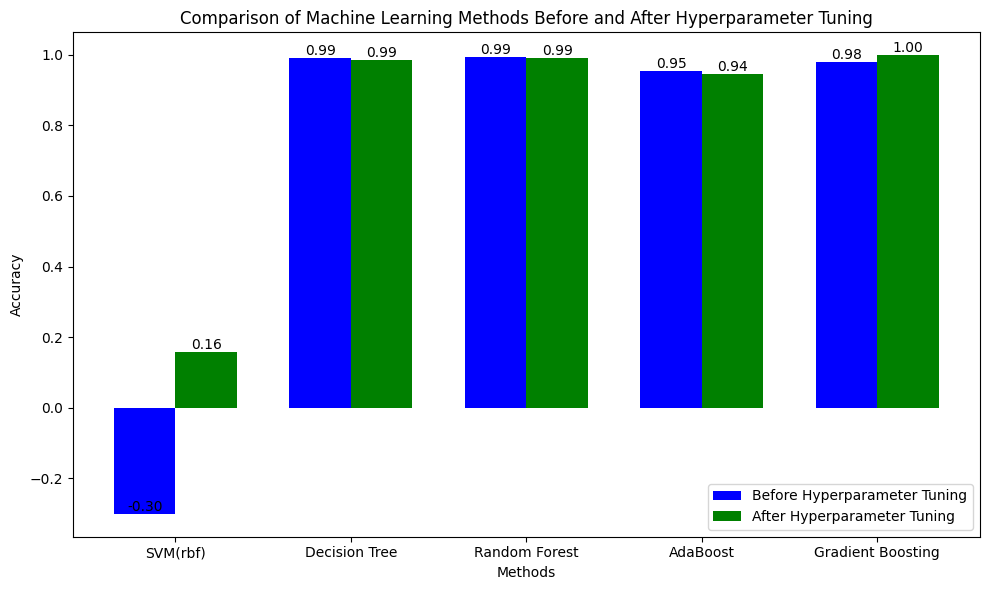

In [106]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(methods))

# Plot bars
bar1 = plt.bar(index, df['BeforeHyp'], bar_width, label='Before Hyperparameter Tuning', color='blue')
bar2 = plt.bar(index + bar_width, df['AfterHyp'], bar_width, label='After Hyperparameter Tuning', color='green')

# Add labels, title, and legend
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Comparison of Machine Learning Methods Before and After Hyperparameter Tuning')
plt.xticks(index + bar_width / 2, methods)
plt.legend()

# Add value labels on top of bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height:.2f}', ha='center', va='bottom')

add_value_labels(bar1)
add_value_labels(bar2)

# Display the plot
plt.tight_layout()
plt.show()